### Import Dependences


In [28]:
import numpy as np
import pandas as pd
import matplotlib . pyplot as plt
from matplotlib.widgets import Slider

from sklearn . tree import DecisionTreeRegressor
from sklearn . ensemble import RandomForestRegressor
from sklearn . ensemble import AdaBoostClassifier
from sklearn . ensemble import GradientBoostingRegressor

from sklearn . preprocessing import OrdinalEncoder , StandardScaler
from sklearn . model_selection import train_test_split
from sklearn . metrics import mean_absolute_error , mean_squared_error, accuracy_score

from sklearn.datasets import make_classification

### AdaBoost Algorithm Building 

#### DecisionTree Stump

In [2]:
class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None

    def fit(self, X, y, w):
        n_samples, n_features = X.shape
        min_error = float('inf')

        """
            Loop through each feature to get the purpose finding threshold and separate
        """
        for feature_i in range(n_features):
            feature_values = X[:, feature_i]
            thresholds = np.unique(feature_values)

            for threshold in thresholds:
                for polarity in [1, -1]:
                    y_pred = np.ones(n_samples)
                    if polarity == 1:
                        y_pred[feature_values < threshold] = -1
                    else:
                        y_pred[feature_values > threshold] = -1

                    # calculate on the sample weight
                    error = np.sum(w * (y_pred != y))

                    if error < min_error:
                        self.polarity = polarity
                        self.threshold = threshold
                        self.feature_index = feature_i
                        min_error = error

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_index]
        y_pred = np.ones(n_samples)
        if self.polarity == 1:
            y_pred[X_column < self.threshold] = -1
        else:
            y_pred[X_column > self.threshold] = -1
        return y_pred

#### AdaBoost Creational 

In [25]:
class AdaBoostClassifierCus:
    """
        weight_initilization: initilization weight  = 1/n_samples
        update_weights: update weights
    
    """
    def __init__(self, n_clf=5):
        self.n_clf = n_clf

    def weight_initilization(self, n_samples):
        w = np.full(n_samples, (1 / n_samples))
        return w
    
    def update_weights(self, w, clf_weight, y, pred):
        w = w * np.exp(-clf_weight * y * pred)
        w = w / np.sum(w)  
        return w
    
    def calculate_error_weights(self, w,y, pred):
        """
            1. Calculate error weak model
            2. Calculate weights of weak model

        """
        error = np.sum(w * (pred != y))
        clf_weight = 0.5 * np.log((1 - error) / (error + 1e-10))
        return clf_weight
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        w = self.weight_initilization(n_samples)
        
        self.clfs = []
        self.clf_weights = []

        for _ in range(self.n_clf):
            clf = DecisionStump()
            clf.fit(X, y, w)
            
            pred = clf.predict(X)
            
            clf_weight= self.calculate_error_weights(w,y,pred)
            w = self.update_weights(w,clf_weight, y,pred)

            self.clfs.append(clf)
            self.clf_weights.append(clf_weight)

    def predict(self, X):
        """
            1. Prediction of strong model based weak models
            2. Arregate prediction from all of weak models
        """
        
        clf_preds = np.array([clf_weight * clf.predict(X) for clf, clf_weight in zip(self.clfs, self.clf_weights)])
        y_pred = np.sign(np.sum(clf_preds, axis=0))
        
        return y_pred

### Data 

#### Data Preparing

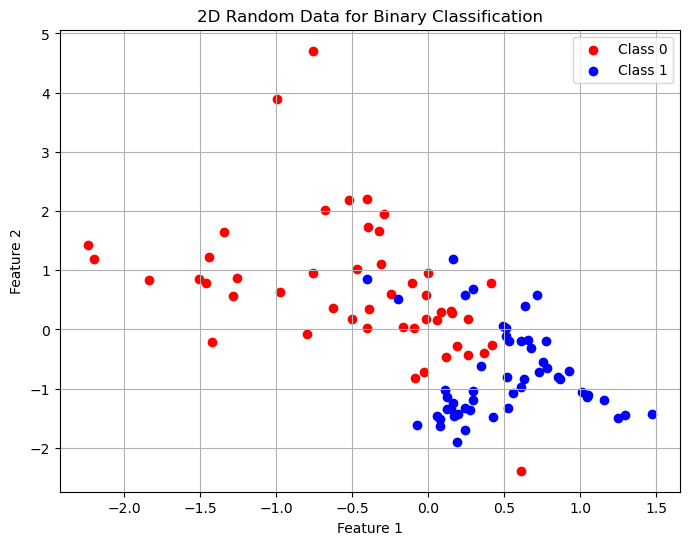

In [10]:
X, y = make_classification(n_samples=100, n_features=4, n_classes=2, n_clusters_per_class=2, random_state=42)

# Convert label to -1 and 1
y = np.where(y == 0, -1, 1)  

plt.figure(figsize=(8, 6))
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('2D Random Data for Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

#### Data Visualization 

In [11]:
print(X.shape)
print(y[0])

(100, 4)
1


### Training, Inference and Evaluation

#### Traing test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)

#### Inference on the customize class

In [29]:
model = AdaBoostClassifierCus(n_clf=30)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

[ 1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.
  1. -1. -1.  1.  1.  1. -1. -1. -1. -1.  1.  1.]
[ 1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1  1
 -1 -1 -1 -1  1  1]
Accuracy: 0.80


#### Inference on the standard library


In [32]:
model = AdaBoostClassifier(n_estimators=50)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### cau 6 bai tap

In [62]:
a = np.array([12,20,28])
print(f'mean: {a.mean()}')
mse = np.sum((a-a.mean())**2)
print(f'mse: {mse}')

mean: 20.0
mse: 128.0
